<a href="https://colab.research.google.com/github/SeongwonTak/TIL_swtak/blob/master/DataScience/210320_Regression_Revisited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 210320 Regression_Model Revisit 1
회귀 관련 내용을 조금 더 찾으면서 비선형 케이스에 대해서 찾아보았다.
참조 : 머신러닝 교과서 p372~377.
      데이터사이언스 스쿨.

## Scikit-Learn을 활용한 다항 회귀
선형 가정이 어긋날 경우, 다항식 항을 추구하여 회귀를 진행한다.
즉, 2차식, 3차식..등등을 활용하여 회귀계수를 추정한다. 다시 말해

$$ y = w_{0} + w_{1}x + .. + w_{d}x^{d}$$ 
형태로 회귀식을 고려한다. 다만, 가중치들이 선형이므로 여전히 다중 선형 회귀 모델로 생각할 수 있다. 

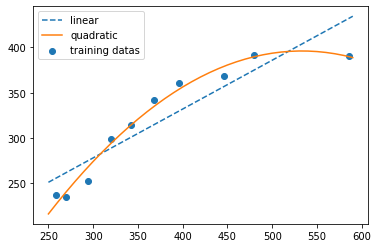

In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = np.array([258, 270, 294, 320, 342, 368, 396, 446, 480, 586])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368, 391.2, 390.8])
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree = 2)
X_quad = quadratic.fit_transform(X)

# 일반적인 선형모델
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# 다항회귀의 적용(2차)
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# 그래프
plt.scatter(X, y, label = 'training datas')
plt.plot(X_fit, y_lin_fit, label='linear', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic')
plt.legend(loc='upper left')
plt.show()

주어진 데이터들은 그림으로만 봐도 선형보다는 2차함수인 경우에 데이터를 조금 더 잘 예측해주고 있다. 실제로 성능 비교를 해보면 다음과 같다.

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

print('mse-linear : %.3f' % (mean_squared_error(y, y_lin_pred)))
print('mse-quad : %.3f' % (mean_squared_error(y, y_quad_pred)))
print('r2-linear : %.3f' % (r2_score(y, y_lin_pred)))
print('r2-quad : %.3f' % (r2_score(y, y_quad_pred)))

mse-linear : 569.780
mse-quad : 61.330
r2-linear : 0.832
r2-quad : 0.982


## 다항함수가 아닌 경우의 예시
다항함수가 아니라 로그 등을 활용하여서도 예측이 가능하다. 이때는 scaling이 작업에 들어간다.
집값 데이터의 LSTAT, MEDV의 관계 분석을 통한 예시로 확인하자.

In [3]:
# data_set 준비
import pandas as pd
from sklearn import datasets
boston_dataset = datasets.load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['target'] = boston_dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


예시는 다음 것들을 비교하고자 한다.
- 1차, 2차, 3차 다항식 기준의 회귀 비교
- 로그 스케일링 이후의 비교

In [5]:
X = df[['LSTAT']].values
y = df['target'].values

regr = LinearRegression()
#이차, 삼차식 생성
quadraic = PolynomialFeatures(degree = 2)
cubic = PolynomialFeatures(degree = 3)

X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# X값 범위룰 잡는다.
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

# 선형 학습
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

# 2차 학습
quad_regr = regr.fit(X_quad, y)
y_quad_fit = quad_regr.predict(quadratic.fit_transform(X_fit))
quad_r2 = r2_score(y, quad_regr.predict(X_quad))

# 3차 학습
cubic_regr = regr.fit(X_cubic, y)
y_cubic_fit = cubic_regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, cubic_regr.predict(X_cubic))

1,2,3차의 그래프를 비교해보려고 한다.

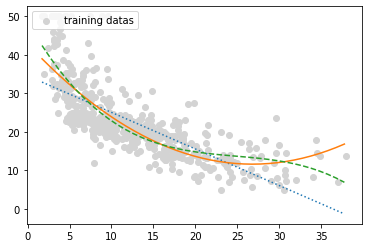

In [7]:
plt.scatter(X, y, label = 'training datas',
            color='lightgray')
plt.plot(X_fit, y_lin_fit,
         linestyle=':')
plt.plot(X_fit, y_quad_fit,
         linestyle='-')
plt.plot(X_fit, y_cubic_fit,
         linestyle='--')

plt.legend(loc='upper left')
plt.show()